1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


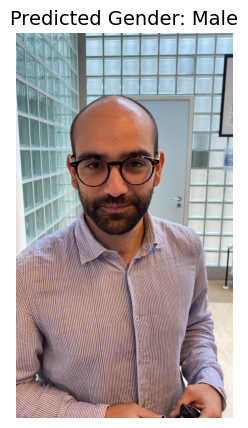

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from PIL import Image
from tensorflow.keras.models import load_model

# Load the saved model
model = load_model('gender_recognition.keras')

# Define the file path of the image
foto_toni_path = "foto.jpeg"  # Update this if the file has a different extension

# Function to preprocess and predict gender
def test_foto_toni(model, filename):
    # Load image using PIL, resize, and normalize
    im = load_img(filename, target_size=(218, 178))  # Resize to match model input
    im = img_to_array(im) / 255.0  # Convert to array & normalize
    im = np.expand_dims(im, axis=0)  # Expand dimensions to match model input
    
    # Make prediction
    probabilities = model.predict(im)  # Raw model prediction
    prediction = np.argmax(probabilities)  # Convert to class label (0: Female, 1: Male)
    
    return prediction, probabilities

# Run prediction for foto_toni
prediction, probabilities = test_foto_toni(model, foto_toni_path)

# Gender label mapping
gender_target = {0: 'Female', 1: 'Male'}

# Display the image and result
img = Image.open(foto_toni_path)

plt.figure(figsize=(5,5))
plt.imshow(img)
plt.axis("off")
plt.title(f"Predicted Gender: {gender_target[prediction]}", fontsize=14)
plt.show()

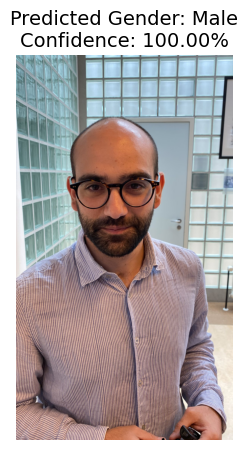

In [3]:
plt.figure(figsize=(5,5))
plt.imshow(img)
plt.axis("off")
plt.title(f"Predicted Gender: {gender_target[prediction]}\nConfidence: {probabilities[0][prediction]*100:.2f}%", fontsize=14)
plt.show()